# Let's rock.
## Creating some model to recognize hand-written text, pretty basic.

We have 28x28 pixel images in black and white (means 1 channel). Let's set this input shape in the first layer, it should be correct to avoid different data processing issues.

Let's use Sequential API because of its simplicity since our task does not require any complex solutions.

Convolutional layers will detect features and auto-learn to detect specific templates on our images. Filter size is set to 3x3 in order to be both effective and fast. Since we are using low-res images and willing to detect as much details as possible.

Max pooling layers will shrink our images and let Conv2D layers to detect more abstract features. For the same reason, let's increase number or filters for deeper layers from 32 to 64.

For activaion function, we will take ReLU since it is fast and helps to avoid gradient vanishing. As we will are not expecting for 'dead neurons' to appear, it fits perfectly.

3 pairs of layers should be enough for the task. Since our task is pretty basic.

Let's then use flatten layer to convert our data to 1-dimensional vector.

Let's also use basic set of number of neurons - 128 and 64 - in order to decrease ovefitting probability and number of features.

In [ ]:
from keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3))
])

In [12]:
from keras import layers
from keras import models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),

    layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [48]:
## for testing purposes

hidden_units = 256
dropout = 0.45

model = models.Sequential()
model.add(layers.Dense(hidden_units, input_dim=784))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(dropout))
model.add(layers.Dense(hidden_units))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(dropout))
model.add(layers.Dense(10))
model.add(layers.Activation('softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 10)               

# Teaching our model

## Data preprocessing:
Let's load the data set and change its size to 28x28 in order to save some computing power.
Then we need to normalize the value of each pixel in order to make learning more stable by decreasing the differences between pixel values.

number of training set - 60000, number of test set - 10000. Validation set - 20% of the training set. 

In [54]:
## processing for testing that is above

from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical ###
from sklearn.model_selection import train_test_split


input_size = 784

path = "/kaggle/input/mnist-my/mnist.npz"
(train_images, train_labels), (test_images, test_labels) = mnist.load_data(path)

train_images = np.reshape(train_images, [-1, input_size])
train_images = train_images.astype('float32') / 255
test_images = np.reshape(test_images, [-1, input_size])
test_images = test_images.astype('float32') / 255

## we can try it
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)

In [49]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical ###

path = "/kaggle/input/mnist-my/mnist.npz"
(train_images, train_labels), (test_images, test_labels) = mnist.load_data(path)

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

## we can try it
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

from sklearn.model_selection import train_test_split

# Предположим, что у вас уже есть train_images, train_labels
# train_images = ...
# train_labels = ...

# Разделение на обучающий и валидационный наборы
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)

# Теперь train_images и train_labels содержат обучающий набор, а val_images и val_labels - валидационный


print(val_labels)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


## Setting the rest of hyperparameters

As optimizer, we can take RMSprop or Adam.

As loss function - sparse_categorical_crossentropy since our data class marks are represented with solid numbers from 0 to 9. Since we are recognizing only hand-written numbers.

Then let's fit our model for 5 epochs (for start), set the batch size to 64 in order to speed up the process, and take 20% of training images for validation.


In [55]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
#     loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [56]:
history = model.fit(
    train_images,
    train_labels,
    epochs=5,
    batch_size=64,
    validation_data=(val_images, val_labels)
)

Epoch 1/5
750/750 [==============================] - 7s 8ms/step - loss: 0.4089 - accuracy: 0.8740 - val_loss: 0.1477 - val_accuracy: 0.9552
Epoch 2/5
750/750 [==============================] - 6s 8ms/step - loss: 0.2012 - accuracy: 0.9406 - val_loss: 0.1156 - val_accuracy: 0.9638
Epoch 3/5
750/750 [==============================] - 6s 8ms/step - loss: 0.1589 - accuracy: 0.9524 - val_loss: 0.1006 - val_accuracy: 0.9703
Epoch 4/5
750/750 [==============================] - 6s 8ms/step - loss: 0.1342 - accuracy: 0.9602 - val_loss: 0.0920 - val_accuracy: 0.9704
Epoch 5/5
750/750 [==============================] - 6s 8ms/step - loss: 0.1214 - accuracy: 0.9626 - val_loss: 0.0874 - val_accuracy: 0.9746


In [ ]:
## this code was done for testing converting to .h5 and back without damage

from keras.models import load_model

# Загрузка модели
loaded_model = load_model('/kaggle/input/mnist-h5/mnist-recognize.h5')

loss, acc = loaded_model.evaluate(test_images, test_labels, batch_size=64)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))
# model_check.predict()

In [60]:
model.save('mnist-recognize.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [57]:
loss, acc = model.evaluate(test_images, test_labels, batch_size=64)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))


157/157 [==============================] - 1s 3ms/step - loss: 0.0843 - accuracy: 0.9744

Test accuracy: 97.4%


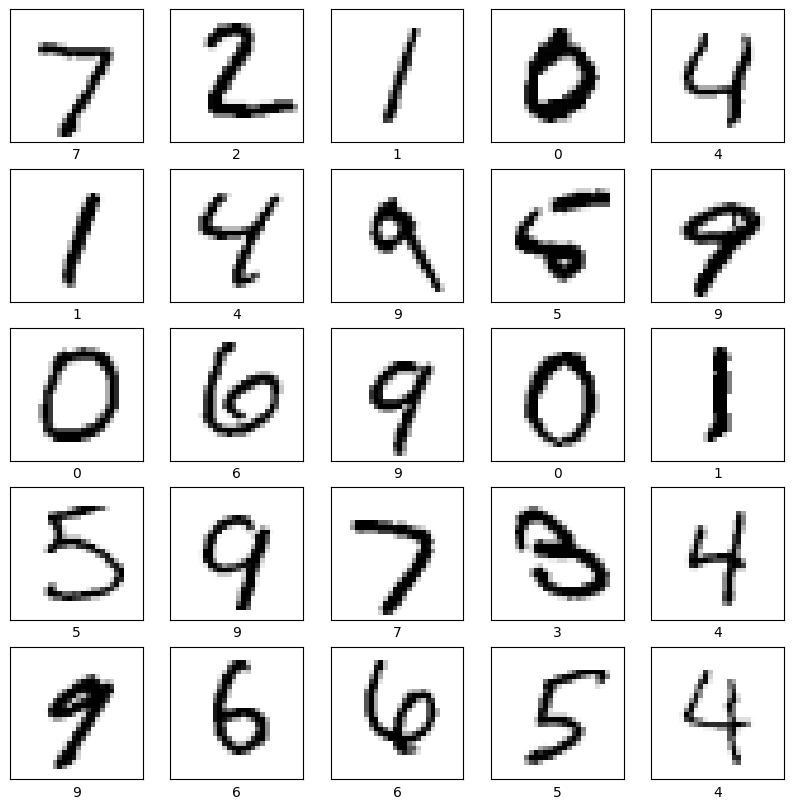

In [58]:
import matplotlib.pyplot as plt
import numpy as np

def plot_images(images, labels, predictions=None):
    plt.figure(figsize=(10, 10))
    for i in range(min(len(images), 25)):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].reshape(28, 28), cmap=plt.cm.binary)
        if predictions is not None:
            predicted_label = np.argmax(predictions[i])
            true_label = np.argmax(labels[i])
            color = 'green' if predicted_label == true_label else 'red'
            plt.xlabel(f'{predicted_label} ({true_label})', color=color)
        else:
            ## encoding one-hot to scalar int for categories
            counter = 0
            for j in labels[i]:
                if j:
                    class_var = counter
                    break
                counter += 1
            plt.xlabel(class_var)
#             plt.xlabel(str(labels[i])) ## this one fits for sparse_categories

    plt.show()
    
plot_images(test_images, test_labels)  # Передайте предсказания, если есть

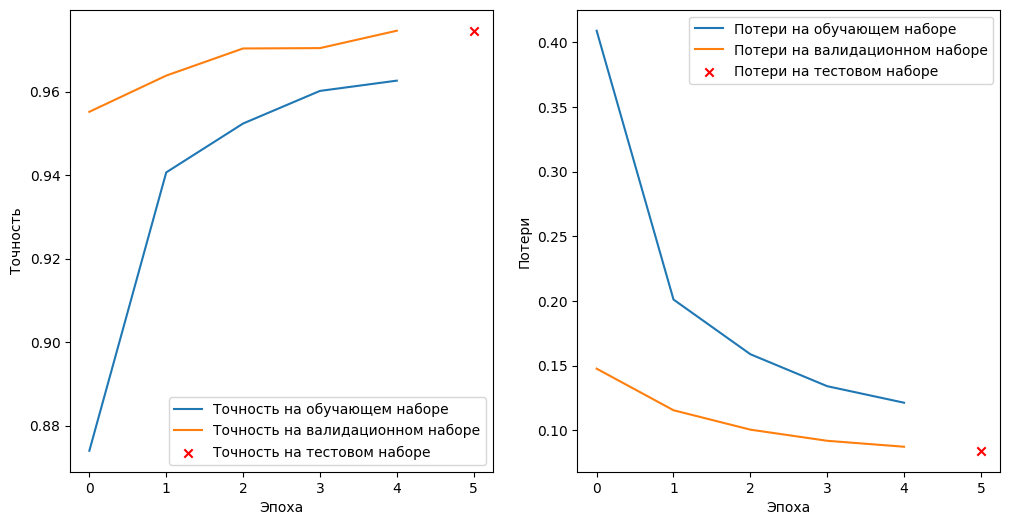

In [59]:
def plot_training_history_with_evaluation(history, evaluation_metrics=None):
    plt.figure(figsize=(12, 6))

    # График точности
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Точность на обучающем наборе')
    
    # Проверка, есть ли метрика для валидационного набора
    if 'val_accuracy' in history.history:
        plt.plot(history.history['val_accuracy'], label='Точность на валидационном наборе')

    plt.xlabel('Эпоха')
    plt.ylabel('Точность')
    
    # Проверка, есть ли метрика для оценки
    if evaluation_metrics is not None and 'accuracy' in evaluation_metrics:
        plt.scatter(len(history.history['accuracy']), evaluation_metrics['accuracy'], c='red', marker='x', label='Точность на тестовом наборе')
    
    plt.legend()

    # График потерь
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Потери на обучающем наборе')
    
    # Проверка, есть ли метрика для валидационного набора
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Потери на валидационном наборе')

    plt.xlabel('Эпоха')
    plt.ylabel('Потери')
    
    # Проверка, есть ли метрика для оценки
    if evaluation_metrics is not None and 'loss' in evaluation_metrics:
        plt.scatter(len(history.history['loss']), evaluation_metrics['loss'], c='red', marker='x', label='Потери на тестовом наборе')
    
    plt.legend()

    plt.show()

# Оценка модели на тестовом наборе
evaluation_metrics = {'loss': loss, 'accuracy': acc}

# Визуализация результатов обучения и оценки
plot_training_history_with_evaluation(history, evaluation_metrics)


Despite ~98-99% accuracy on test data with 3 epochs, real tests show very low accuracy.